Dataset Overview:
Total rows: 260920
Columns: ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder']

First few rows:
   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3

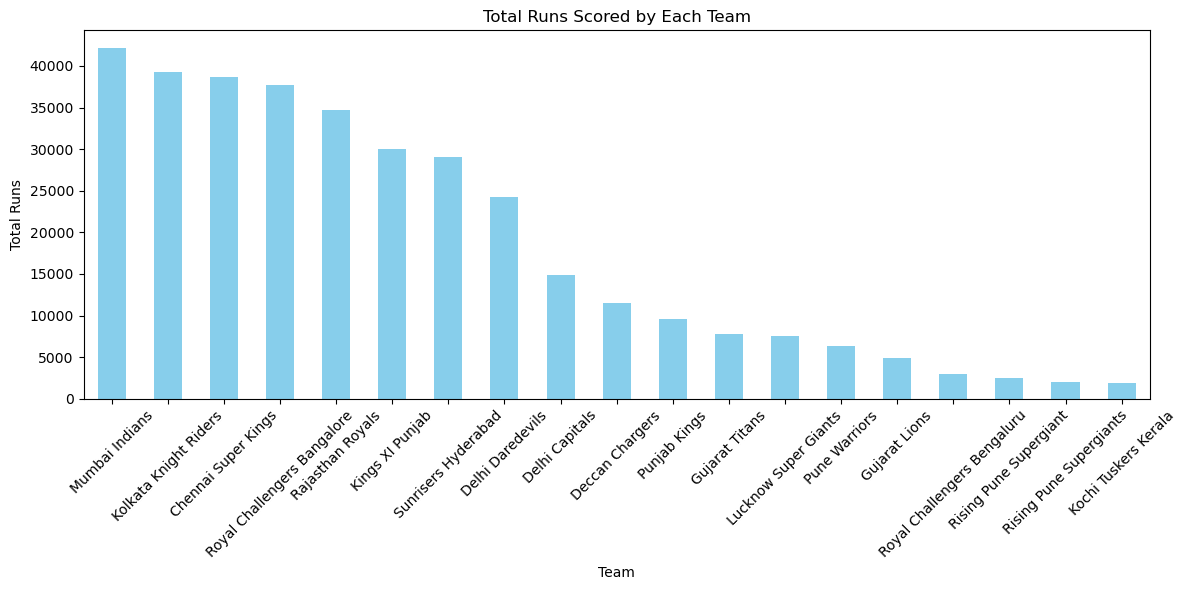

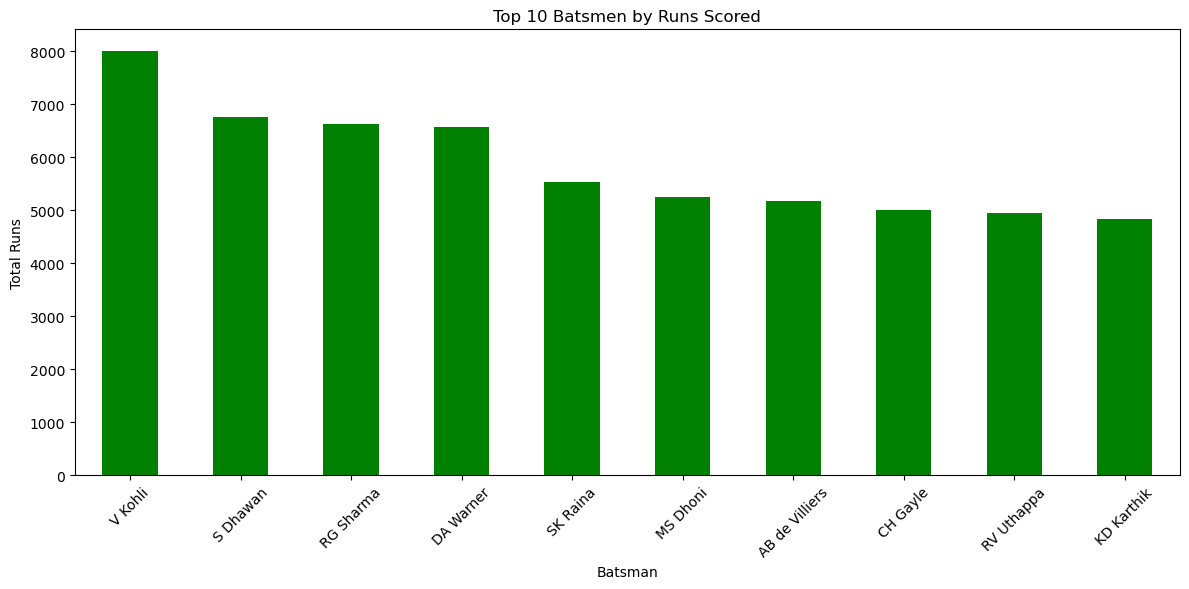

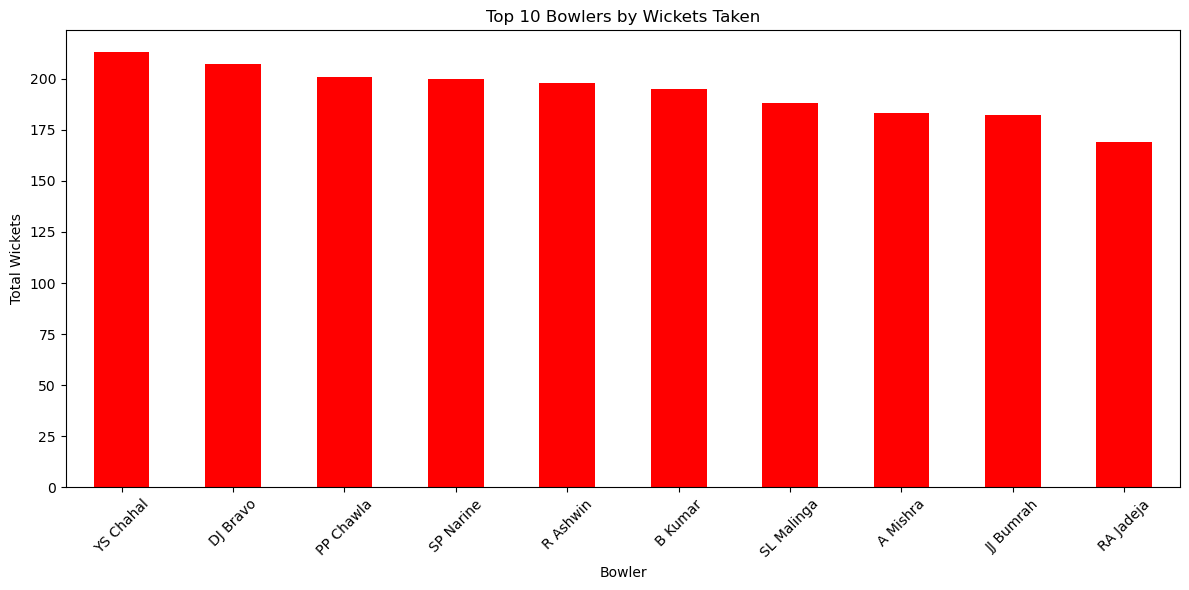

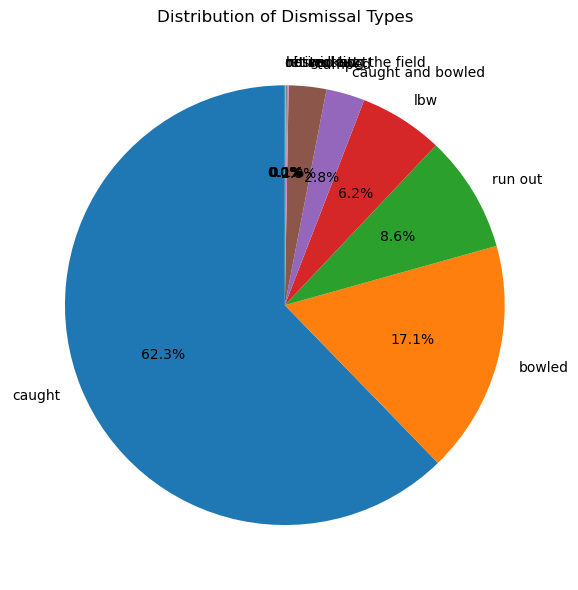

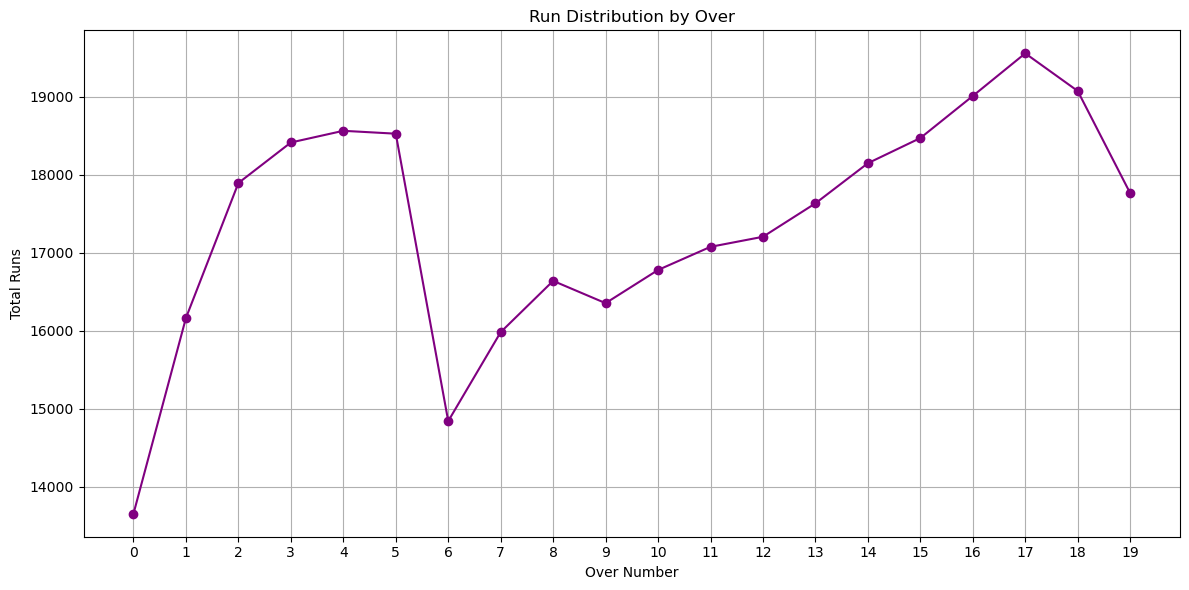

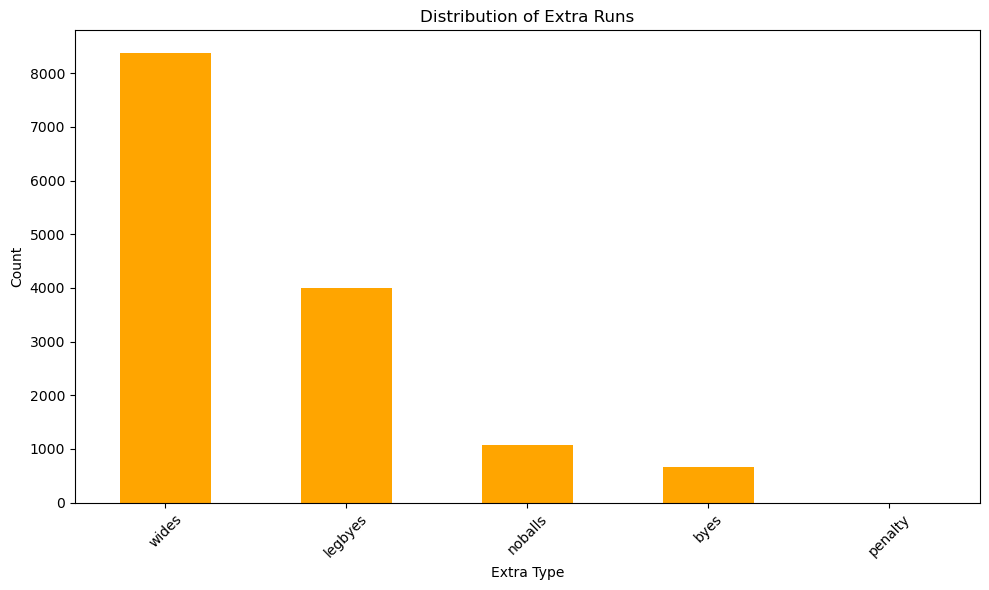

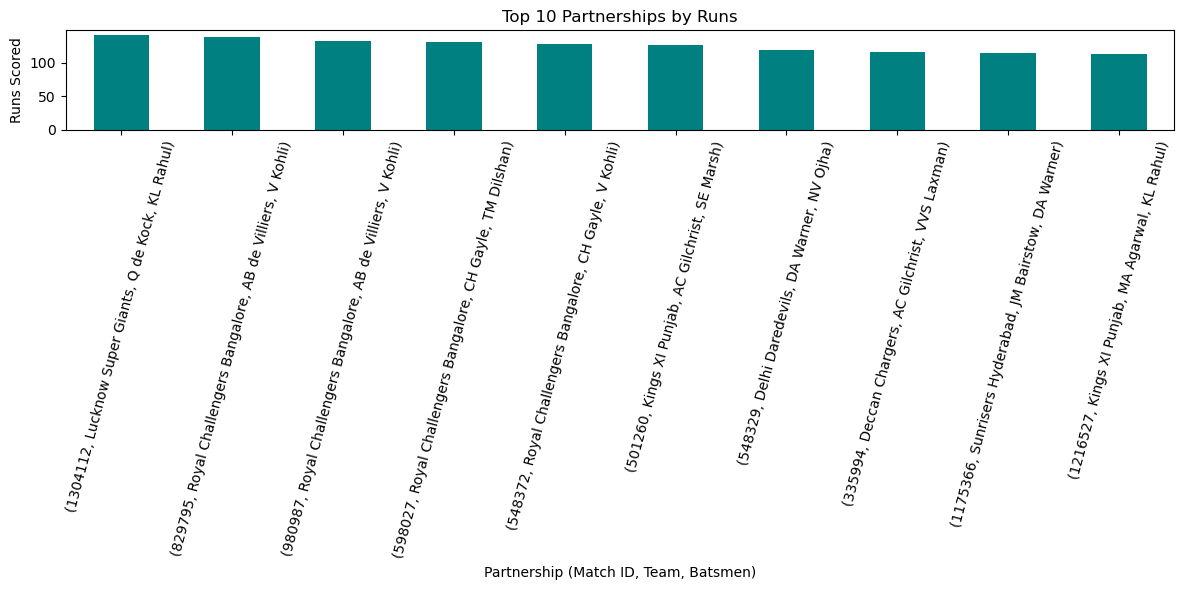

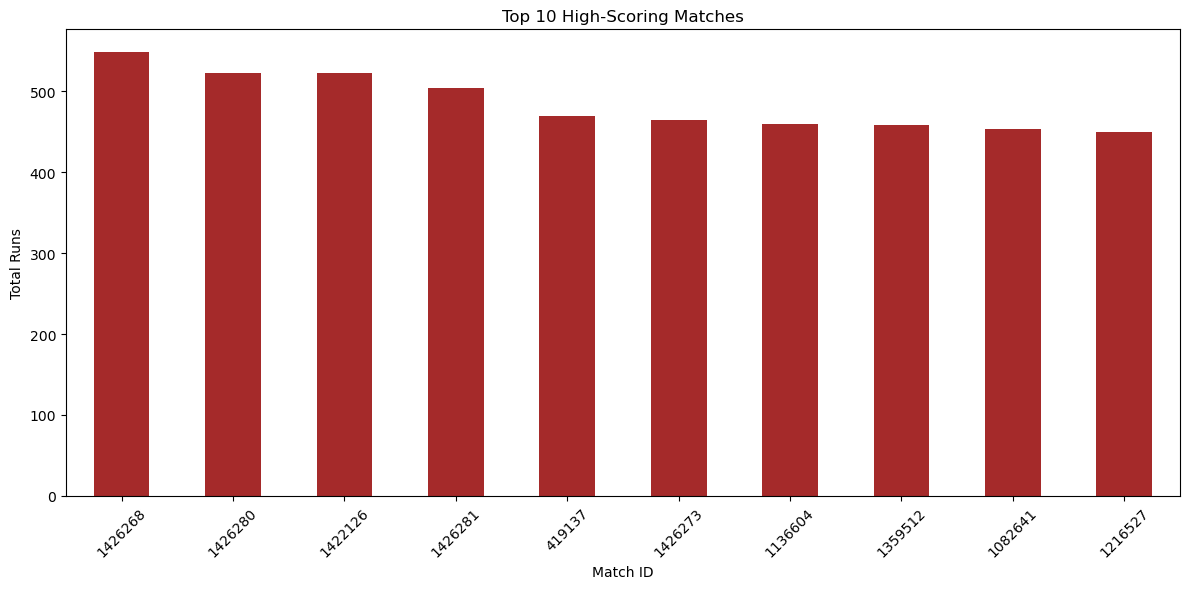

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df = pd.read_csv('deliveries.csv')

# Basic Data Exploration
print("Dataset Overview:")
print(f"Total rows: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())

# 1. Total Runs Scored by Each Team
team_runs = df.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)
print("\nTotal Runs by Team:")
print(team_runs)

# 2. Top Batsmen by Runs
top_batsmen = df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Batsmen:")
print(top_batsmen)

# 3. Top Bowlers by Wickets
top_bowlers = df[df['is_wicket'] == 1].groupby('bowler')['is_wicket'].count().sort_values(ascending=False).head(10)
print("\nTop 10 Bowlers by Wickets:")
print(top_bowlers)

# 4. Most Common Dismissal Types
dismissal_counts = df[df['is_wicket'] == 1]['dismissal_kind'].value_counts()
print("\nDismissal Types:")
print(dismissal_counts)

# 5. Run Distribution by Over
runs_by_over = df.groupby('over')['total_runs'].sum()
print("\nRuns by Over:")
print(runs_by_over)

# Visualization 1: Total Runs by Team
plt.figure(figsize=(12, 6))
team_runs.plot(kind='bar', color='skyblue')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Top Batsmen
plt.figure(figsize=(12, 6))
top_batsmen.plot(kind='bar', color='green')
plt.title('Top 10 Batsmen by Runs Scored')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 3: Top Bowlers
plt.figure(figsize=(12, 6))
top_bowlers.plot(kind='bar', color='red')
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 4: Dismissal Types
plt.figure(figsize=(10, 6))
dismissal_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Dismissal Types')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Visualization 5: Runs by Over
plt.figure(figsize=(12, 6))
runs_by_over.plot(kind='line', marker='o', color='purple')
plt.title('Run Distribution by Over')
plt.xlabel('Over Number')
plt.ylabel('Total Runs')
plt.xticks(range(0, 20))
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 6: Extra Runs Analysis
extra_runs = df[df['extra_runs'] > 0]['extras_type'].value_counts()
plt.figure(figsize=(10, 6))
extra_runs.plot(kind='bar', color='orange')
plt.title('Distribution of Extra Runs')
plt.xlabel('Extra Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 7: Partnership Analysis (Top 10 partnerships by runs)
partnerships = df.groupby(['match_id', 'batting_team', 'batter', 'non_striker'])['total_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
partnerships.plot(kind='bar', color='teal')
plt.title('Top 10 Partnerships by Runs')
plt.xlabel('Partnership (Match ID, Team, Batsmen)')
plt.ylabel('Runs Scored')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

# Visualization 8: Runs per match (Top 10 high-scoring matches)
match_runs = df.groupby('match_id')['total_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
match_runs.plot(kind='bar', color='brown')
plt.title('Top 10 High-Scoring Matches')
plt.xlabel('Match ID')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
print("Dataset Overview:")
print(f"Total rows: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())

Dataset Overview:
Total rows: 260920
Columns: ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder']

First few rows:
   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3

In [5]:
team_runs = df.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)
print("\nTotal Runs by Team:")
print(team_runs)


Total Runs by Team:
batting_team
Mumbai Indians                 42176
Kolkata Knight Riders          39331
Chennai Super Kings            38629
Royal Challengers Bangalore    37692
Rajasthan Royals               34747
Kings XI Punjab                30064
Sunrisers Hyderabad            29071
Delhi Daredevils               24296
Delhi Capitals                 14900
Deccan Chargers                11463
Punjab Kings                    9536
Gujarat Titans                  7757
Lucknow Super Giants            7510
Pune Warriors                   6358
Gujarat Lions                   4862
Royal Challengers Bengaluru     2930
Rising Pune Supergiant          2470
Rising Pune Supergiants         2063
Kochi Tuskers Kerala            1901
Name: total_runs, dtype: int64


In [7]:
top_batsmen = df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Batsmen:")
print(top_batsmen)


Top 10 Batsmen:
batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64


In [9]:
top_bowlers = df[df['is_wicket'] == 1].groupby('bowler')['is_wicket'].count().sort_values(ascending=False).head(10)
print("\nTop 10 Bowlers by Wickets:")
print(top_bowlers)



Top 10 Bowlers by Wickets:
bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
Name: is_wicket, dtype: int64


In [11]:
dismissal_counts = df[df['is_wicket'] == 1]['dismissal_kind'].value_counts()
print("\nDismissal Types:")
print(dismissal_counts)


Dismissal Types:
dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64


In [13]:
runs_by_over = df.groupby('over')['total_runs'].sum()
print("\nRuns by Over:")
print(runs_by_over)


Runs by Over:
over
0     13651
1     16163
2     17895
3     18415
4     18565
5     18528
6     14839
7     15981
8     16639
9     16353
10    16779
11    17076
12    17205
13    17634
14    18149
15    18472
16    19012
17    19559
18    19076
19    17765
Name: total_runs, dtype: int64


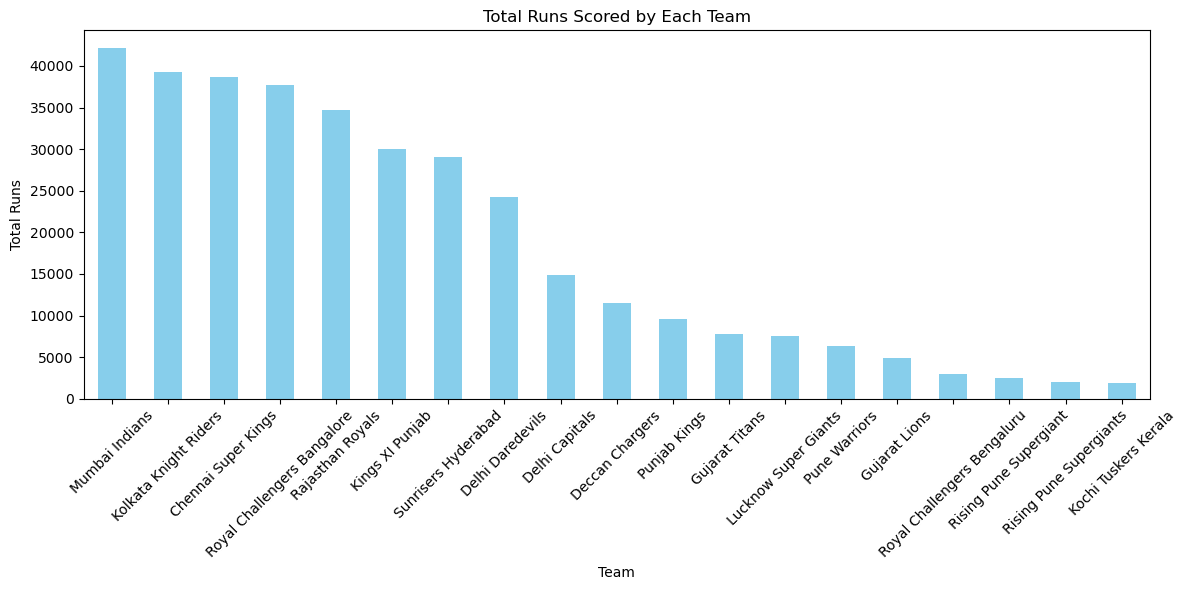

In [15]:
plt.figure(figsize=(12, 6))
team_runs.plot(kind='bar', color='skyblue')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

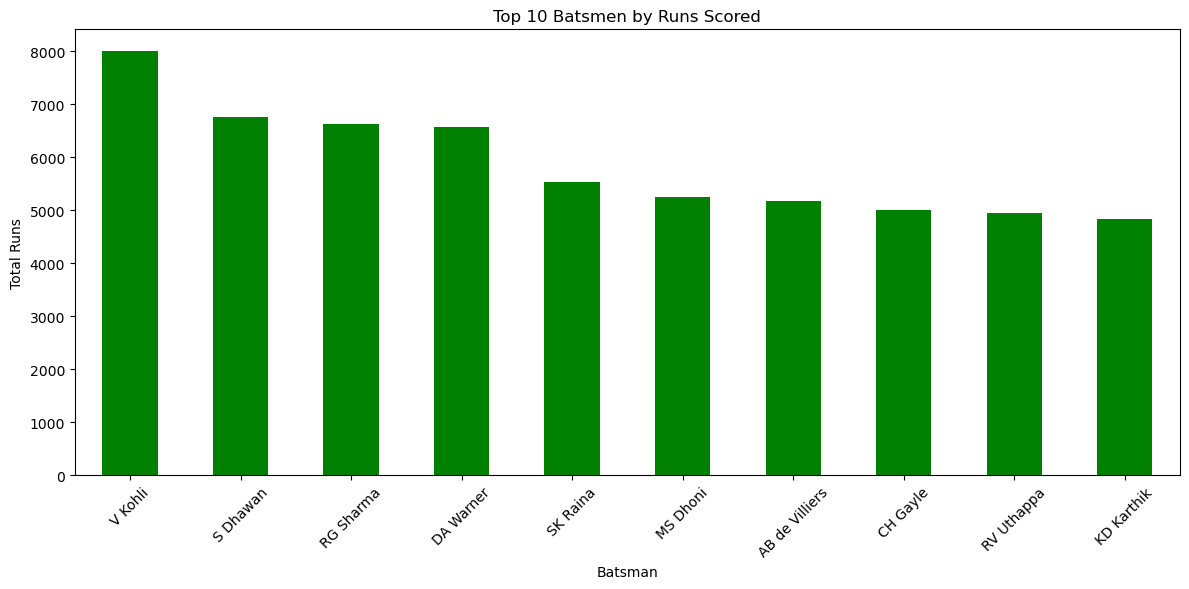

In [17]:
plt.figure(figsize=(12, 6))
top_batsmen.plot(kind='bar', color='green')
plt.title('Top 10 Batsmen by Runs Scored')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


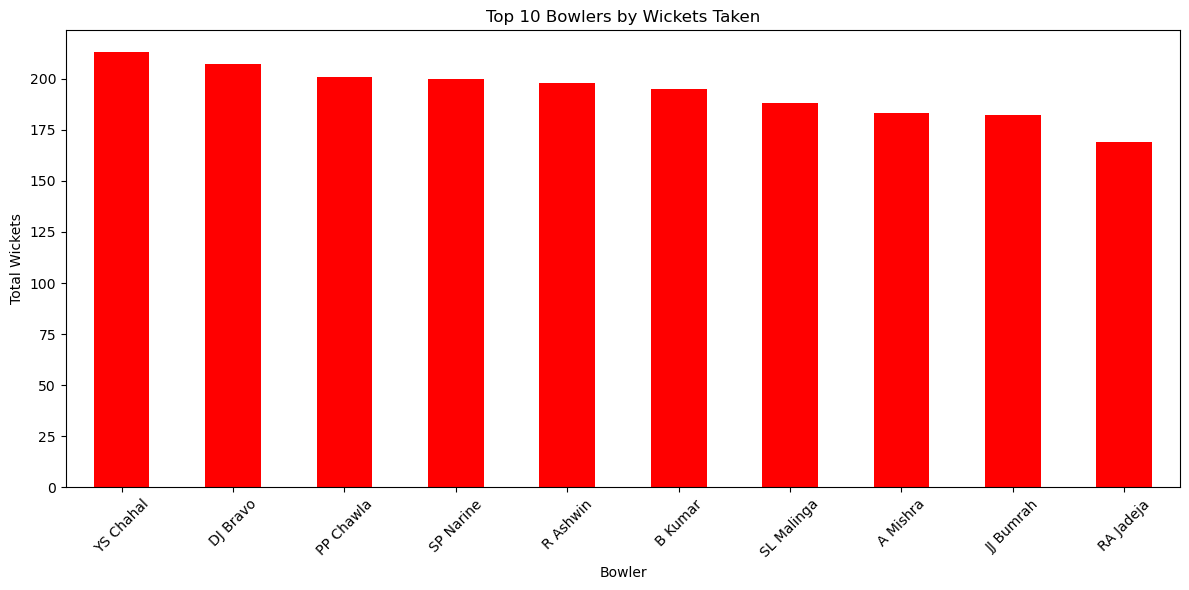

In [19]:
plt.figure(figsize=(12, 6))
top_bowlers.plot(kind='bar', color='red')
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

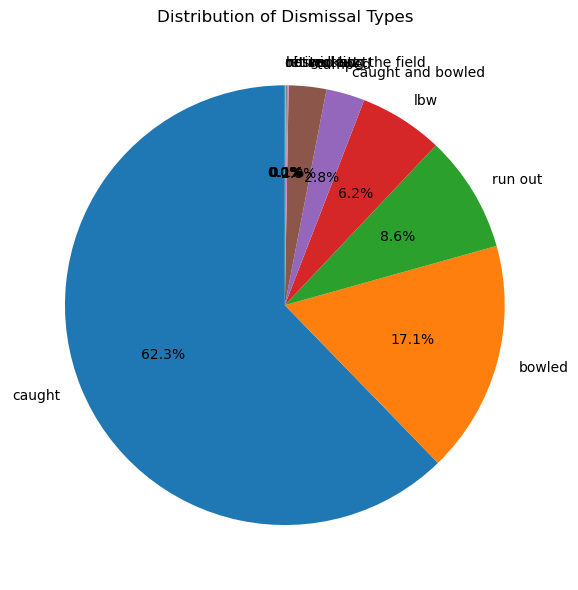

In [21]:
plt.figure(figsize=(10, 6))
dismissal_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Dismissal Types')
plt.ylabel('')
plt.tight_layout()
plt.show()

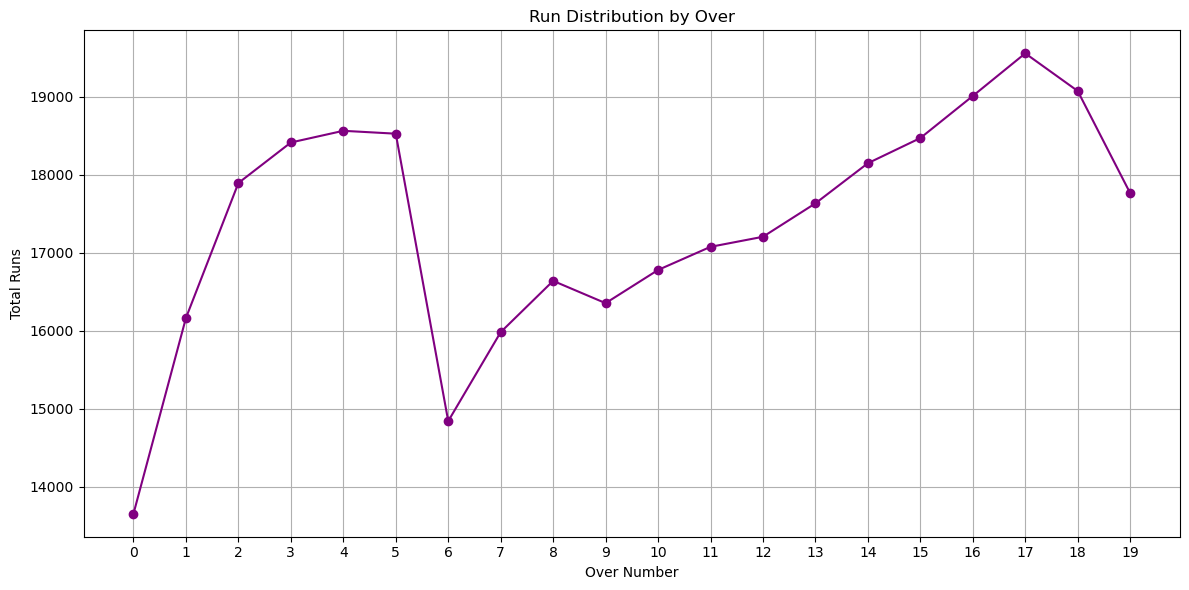

In [23]:
plt.figure(figsize=(12, 6))
runs_by_over.plot(kind='line', marker='o', color='purple')
plt.title('Run Distribution by Over')
plt.xlabel('Over Number')
plt.ylabel('Total Runs')
plt.xticks(range(0, 20))
plt.grid(True)
plt.tight_layout()
plt.show()

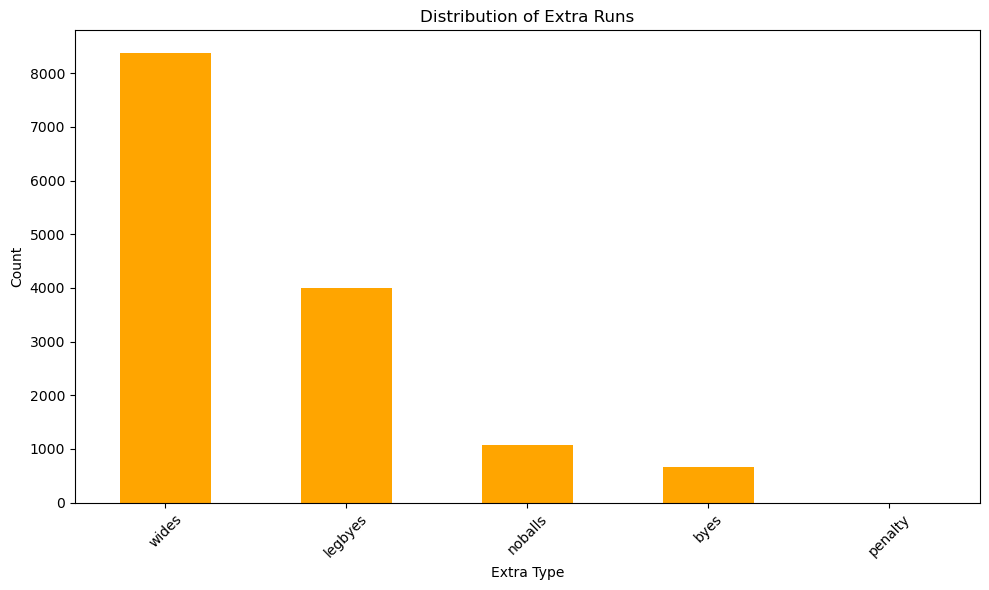

In [25]:
extra_runs = df[df['extra_runs'] > 0]['extras_type'].value_counts()
plt.figure(figsize=(10, 6))
extra_runs.plot(kind='bar', color='orange')
plt.title('Distribution of Extra Runs')
plt.xlabel('Extra Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

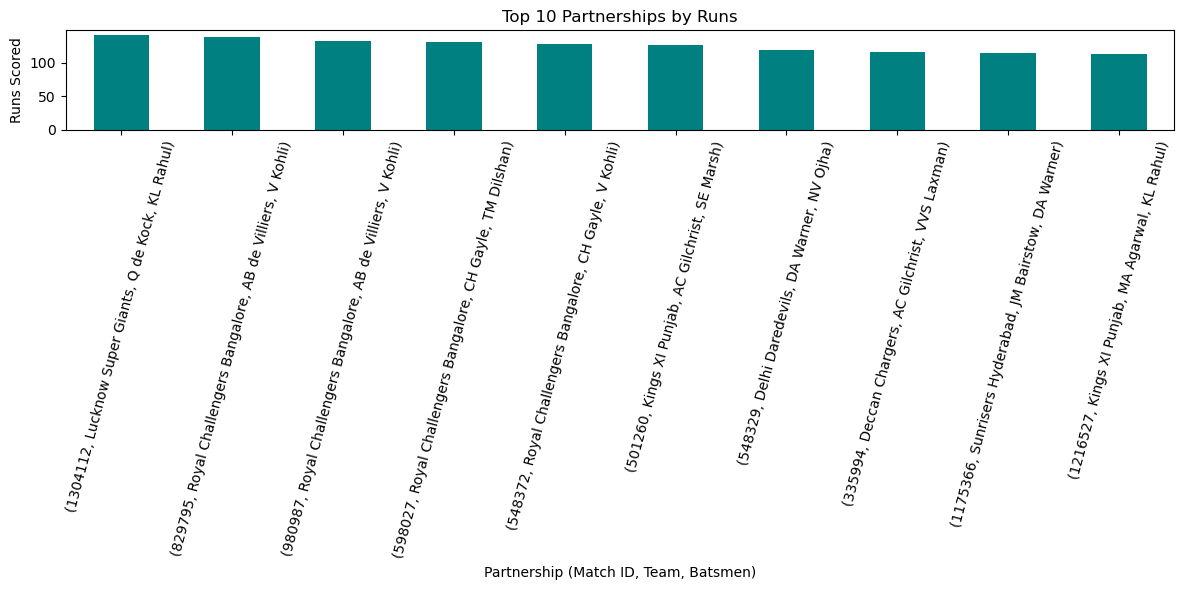

In [27]:
partnerships = df.groupby(['match_id', 'batting_team', 'batter', 'non_striker'])['total_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
partnerships.plot(kind='bar', color='teal')
plt.title('Top 10 Partnerships by Runs')
plt.xlabel('Partnership (Match ID, Team, Batsmen)')
plt.ylabel('Runs Scored')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()